In [2]:
# Import python libraries as needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
import scipy.stats as sts

# Generic hypothesis testing function
def HypoTesting(p_val, alpha=0.05):
    if p_val > alpha:
        print('We do not reject the null hypothesis.')
    else:
        print('We reject the null hypothesis.')

In [8]:
# Import the CSV file
df = pd.read_csv('NSMES1988.csv', index_col=0)
df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,afam,gender,married,school,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,normal,other,6.9,yes,male,yes,6,2.8810,yes,yes,no
2,1,0,2,0,2,0,average,2,normal,other,7.4,no,female,yes,10,2.7478,no,yes,no
3,13,0,0,0,3,3,poor,4,limited,other,6.6,yes,female,no,10,0.6532,no,no,yes
4,16,0,5,0,1,1,poor,2,limited,other,7.6,no,male,yes,3,0.6588,no,yes,no
5,3,0,0,0,0,0,average,2,limited,other,7.9,no,female,yes,6,0.6588,no,yes,no


Observation: this file had an index column that needed to be accounted for.

In [9]:
# Convert age and income to their proper values based on the data dictionary.
df['age'] = df['age'] * 10
df['income'] = df['income'] * 10000
df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,afam,gender,married,school,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,normal,other,69.0,yes,male,yes,6,28810.0,yes,yes,no
2,1,0,2,0,2,0,average,2,normal,other,74.0,no,female,yes,10,27478.0,no,yes,no
3,13,0,0,0,3,3,poor,4,limited,other,66.0,yes,female,no,10,6532.0,no,no,yes
4,16,0,5,0,1,1,poor,2,limited,other,76.0,no,male,yes,3,6588.0,no,yes,no
5,3,0,0,0,0,0,average,2,limited,other,79.0,no,female,yes,6,6588.0,no,yes,no


Identify different data types

In [10]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 4406 entries, 1 to 4406
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float64
 11  afam       4406 non-null   object 
 12  gender     4406 non-null   object 
 13  married    4406 non-null   object 
 14  school     4406 non-null   int64  
 15  income     4406 non-null   float64
 16  employed   4406 non-null   object 
 17  insurance  4406 non-null   object 
 18  medicaid   4406 non-null   object 
dtypes: float64(2), int64(8), object(9)
memory usage: 2.4 

This can be optimized for memory much like we did in the previous exercise

In [11]:
for col in ('age', 'income'):
    df[col] = pd.to_numeric(df[col], downcast="float")
for col in ('visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital', 'chronic', 'school'):
    df[col] = pd.to_numeric(df[col], downcast="integer")
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 4406 entries, 1 to 4406
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int8   
 1   nvisits    4406 non-null   int8   
 2   ovisits    4406 non-null   int16  
 3   novisits   4406 non-null   int16  
 4   emergency  4406 non-null   int8   
 5   hospital   4406 non-null   int8   
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int8   
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float32
 11  afam       4406 non-null   object 
 12  gender     4406 non-null   object 
 13  married    4406 non-null   object 
 14  school     4406 non-null   int8   
 15  income     4406 non-null   float64
 16  employed   4406 non-null   object 
 17  insurance  4406 non-null   object 
 18  medicaid   4406 non-null   object 
dtypes: float32(1), float64(1), int16(2), int8(6), object(

Identify categorical types in the data

In [12]:
cat_features_list = df.select_dtypes(include='object').columns
cat_features_list

Index(['health', 'adl', 'region', 'afam', 'gender', 'married', 'employed',
       'insurance', 'medicaid'],
      dtype='object')

Get basic statistical measures for the numerical columns in the dataset

In [22]:
cat_numeric_list = df.select_dtypes(include=np.number).columns
df[cat_numeric_list].describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,74.024055,10.290286,25271.320468
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,6.334050,3.738736,29246.476178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,-10125.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69.000000,8.000000,9121.500000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.000000,11.000000,16981.500000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,78.000000,12.000000,31728.500000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,109.000000,18.000000,548351.000000


## Observations
- Why is the minimum income negative? Possible bad data?
- Maximum age is 109? That's a stretch, but not impossible. Probably an outlier.
- Maximum number of visits is 104 in a year?

Non-graphical analysis using data aggregation:
• What is the total number of hospital stays for different employment statuses?

In [43]:
# Total hospital stays
df_stays_by_employment = df.groupby('employed')['hospital'].sum()
df_stays_by_employment

employed
no     1201
yes     103
Name: hospital, dtype: int64

In [44]:
# Total patients: thanks to Aditya for spotting this
df_patients_by_employment = df.groupby('employed')['hospital'].count()
df_patients_by_employment

employed
no     3951
yes     455
Name: hospital, dtype: int64

In [45]:
df.groupby('employed')['hospital'].head(50)

1      1
2      0
3      3
4      1
5      0
      ..
403    1
409    0
411    0
416    0
421    0
Name: hospital, Length: 100, dtype: int8

**Observations**
- Many patients have no visits, so the total overall number of visits is smaller than the number of patients.
- Roughly one visit for every four patients
- Unemployed patients have more than 10 times as many visits as employed patients.
- However, there are almost 10 times as many unemployed patients, which may account for this.


• Build a pivot table that shows all numerical measures with health column as an index

In [46]:
pt = df.pivot_table(df[cat_numeric_list], index='health', aggfunc=['mean']) #, values=data_for_buckets, agg_func=functions)
pt.head()

mean                                                        \
                 age   chronic emergency  hospital        income  novisits   
health                                                                       
average    73.849243  1.430892  0.223425  0.252779  25519.896449  0.548589   
excellent  73.102043  0.749271  0.096210  0.099125  32774.114577  0.163265   
poor       75.702164  2.736462  0.620939  0.691336  19051.624621  0.687726   

                                                    
            nvisits   ovisits     school    visits  
health                                              
average    1.652323  0.691650  10.426617  5.510687  
excellent  1.588921  0.341108  11.329446  3.428571  
poor       1.418773  1.379061   8.783394  8.897112

**Observations**
- There seems to be a correlation between more chronic conditions and poor health
- There seems to be a correlation between poor health and low income
- People with poor health tend to have the highest number of visits across all types EXCEPT for non-physician office visits, where they have the lowest
    - But for non-physician office visits, people with average health have more visits than people in excellent health, so this doesn't seem to be a linear kind of correlation

• What is the median number of emergency room visits for each region and gender combination?

In [47]:
my_agg = df.pivot_table(index='region', values=['visits'], columns=['gender'], aggfunc=['median']).round(2)

my_agg

median     
          visits     
gender    female male
region               
midwest      4.0  3.0
northeast    4.0  4.0
other        4.0  3.0
west         5.0  4.0

**Observations**
- Women visit more in the western region than the other three
- Women tend to visit slightly more often than men (difference is usually between 0 and 1)
- In the Northeast, men and women have the same number of visits

• Get the number of individuals covered by Medicaid and its effect on the number of hospital stays

In [49]:
df.groupby('medicaid')['hospital'].value_counts()

medicaid  hospital
no        0           3244
          1            536
          2            147
          3             39
          4             18
          5             11
          6              4
          8              4
          7              1
yes       0            297
          1             63
          2             29
          3              9
          4              2
          5              1
          6              1
Name: count, dtype: int64

In [50]:
df.groupby('medicaid')['hospital'].count()

medicaid
no     4004
yes     402
Name: hospital, dtype: int64

In [55]:
my_agg = df.pivot_table(index='medicaid', values=['hospital'], aggfunc=['count', 'sum', 'mean']).round(2)
my_agg

,count,sum,mean
,hospital,hospital,hospital
medicaid,,,
no,4004,1137,0.28
yes,402,167,0.42


In [57]:
my_agg = df.pivot_table(index='insurance', values=['hospital'],columns=['medicaid'], aggfunc=['count', 'sum', 'mean']).round(2)
my_agg

count           sum          mean      
          hospital      hospital      hospital      
medicaid        no  yes       no  yes       no   yes
insurance                                           
no             644  341      164  142     0.25  0.42
yes           3360   61      973   25     0.29  0.41

**Observations**
- There are almost exactly ten times as many people not covered by Medicaid as who are, and this will affect the numbers.
- There do seem to be more visits per covered person than per non-covered person.

# Pandas and Data Visualization

In [59]:
plt.style.use('ggplot')

• Build a histogram for every numerical column using subplots and report the columns that have a
lot of outliers

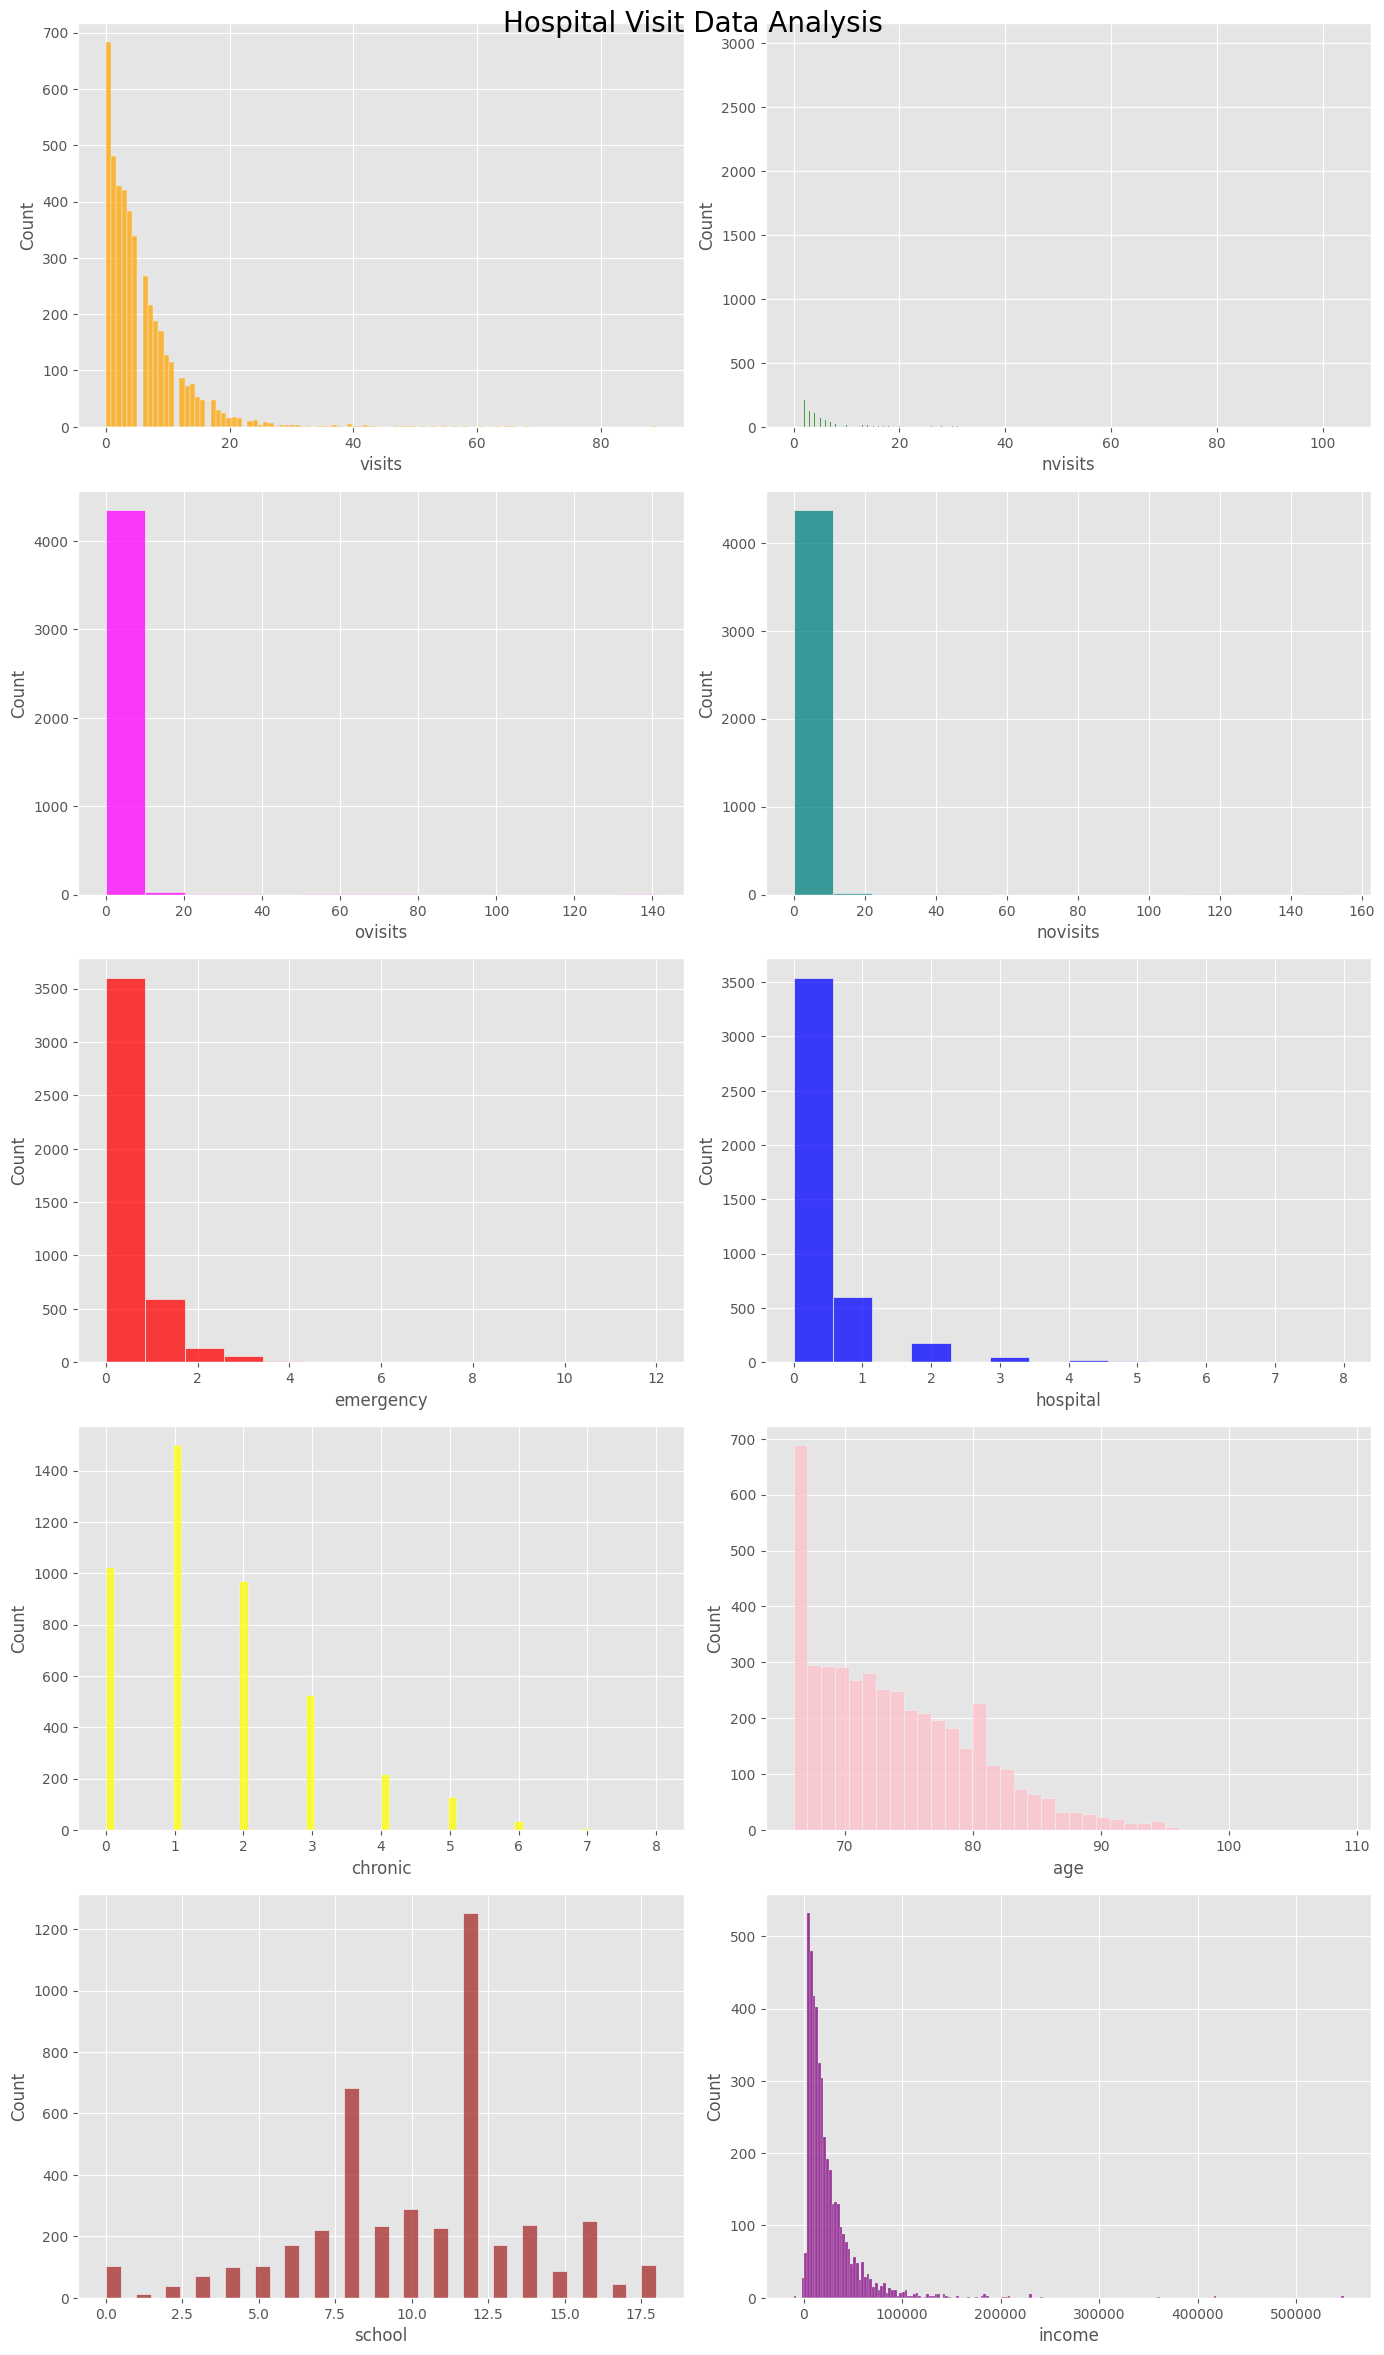

In [65]:
# build a grid (5x2) total of 10 cells
fig, axes = plt.subplots(nrows=5, ncols=2, figsize = (14,24), dpi = 100)

colors_list = ['orange','green','magenta','teal','red','blue','yellow','pink','brown','purple']

#flatten the axes so that we can have a series from 0 to 3 instead of [0,0] for example.
axes = axes.flatten()

#loop through each column name and plot it.
for idx, col in enumerate(cat_numeric_list):
    sns.histplot(data=df, x=col, ax=axes[idx], color=colors_list[idx])

# Layout
fig.suptitle('Hospital Visit Data Analysis', fontsize=20)
fig.tight_layout(pad=1.2, w_pad=1)


**Observations**
- Income and Age definitely have a lot of outliers.
- Chronic and Hospital also have some outliers.


Perform box and whisker analysis based on the following categories:
• Different types of visits
• Gender
• Marital Status
• Employment Status

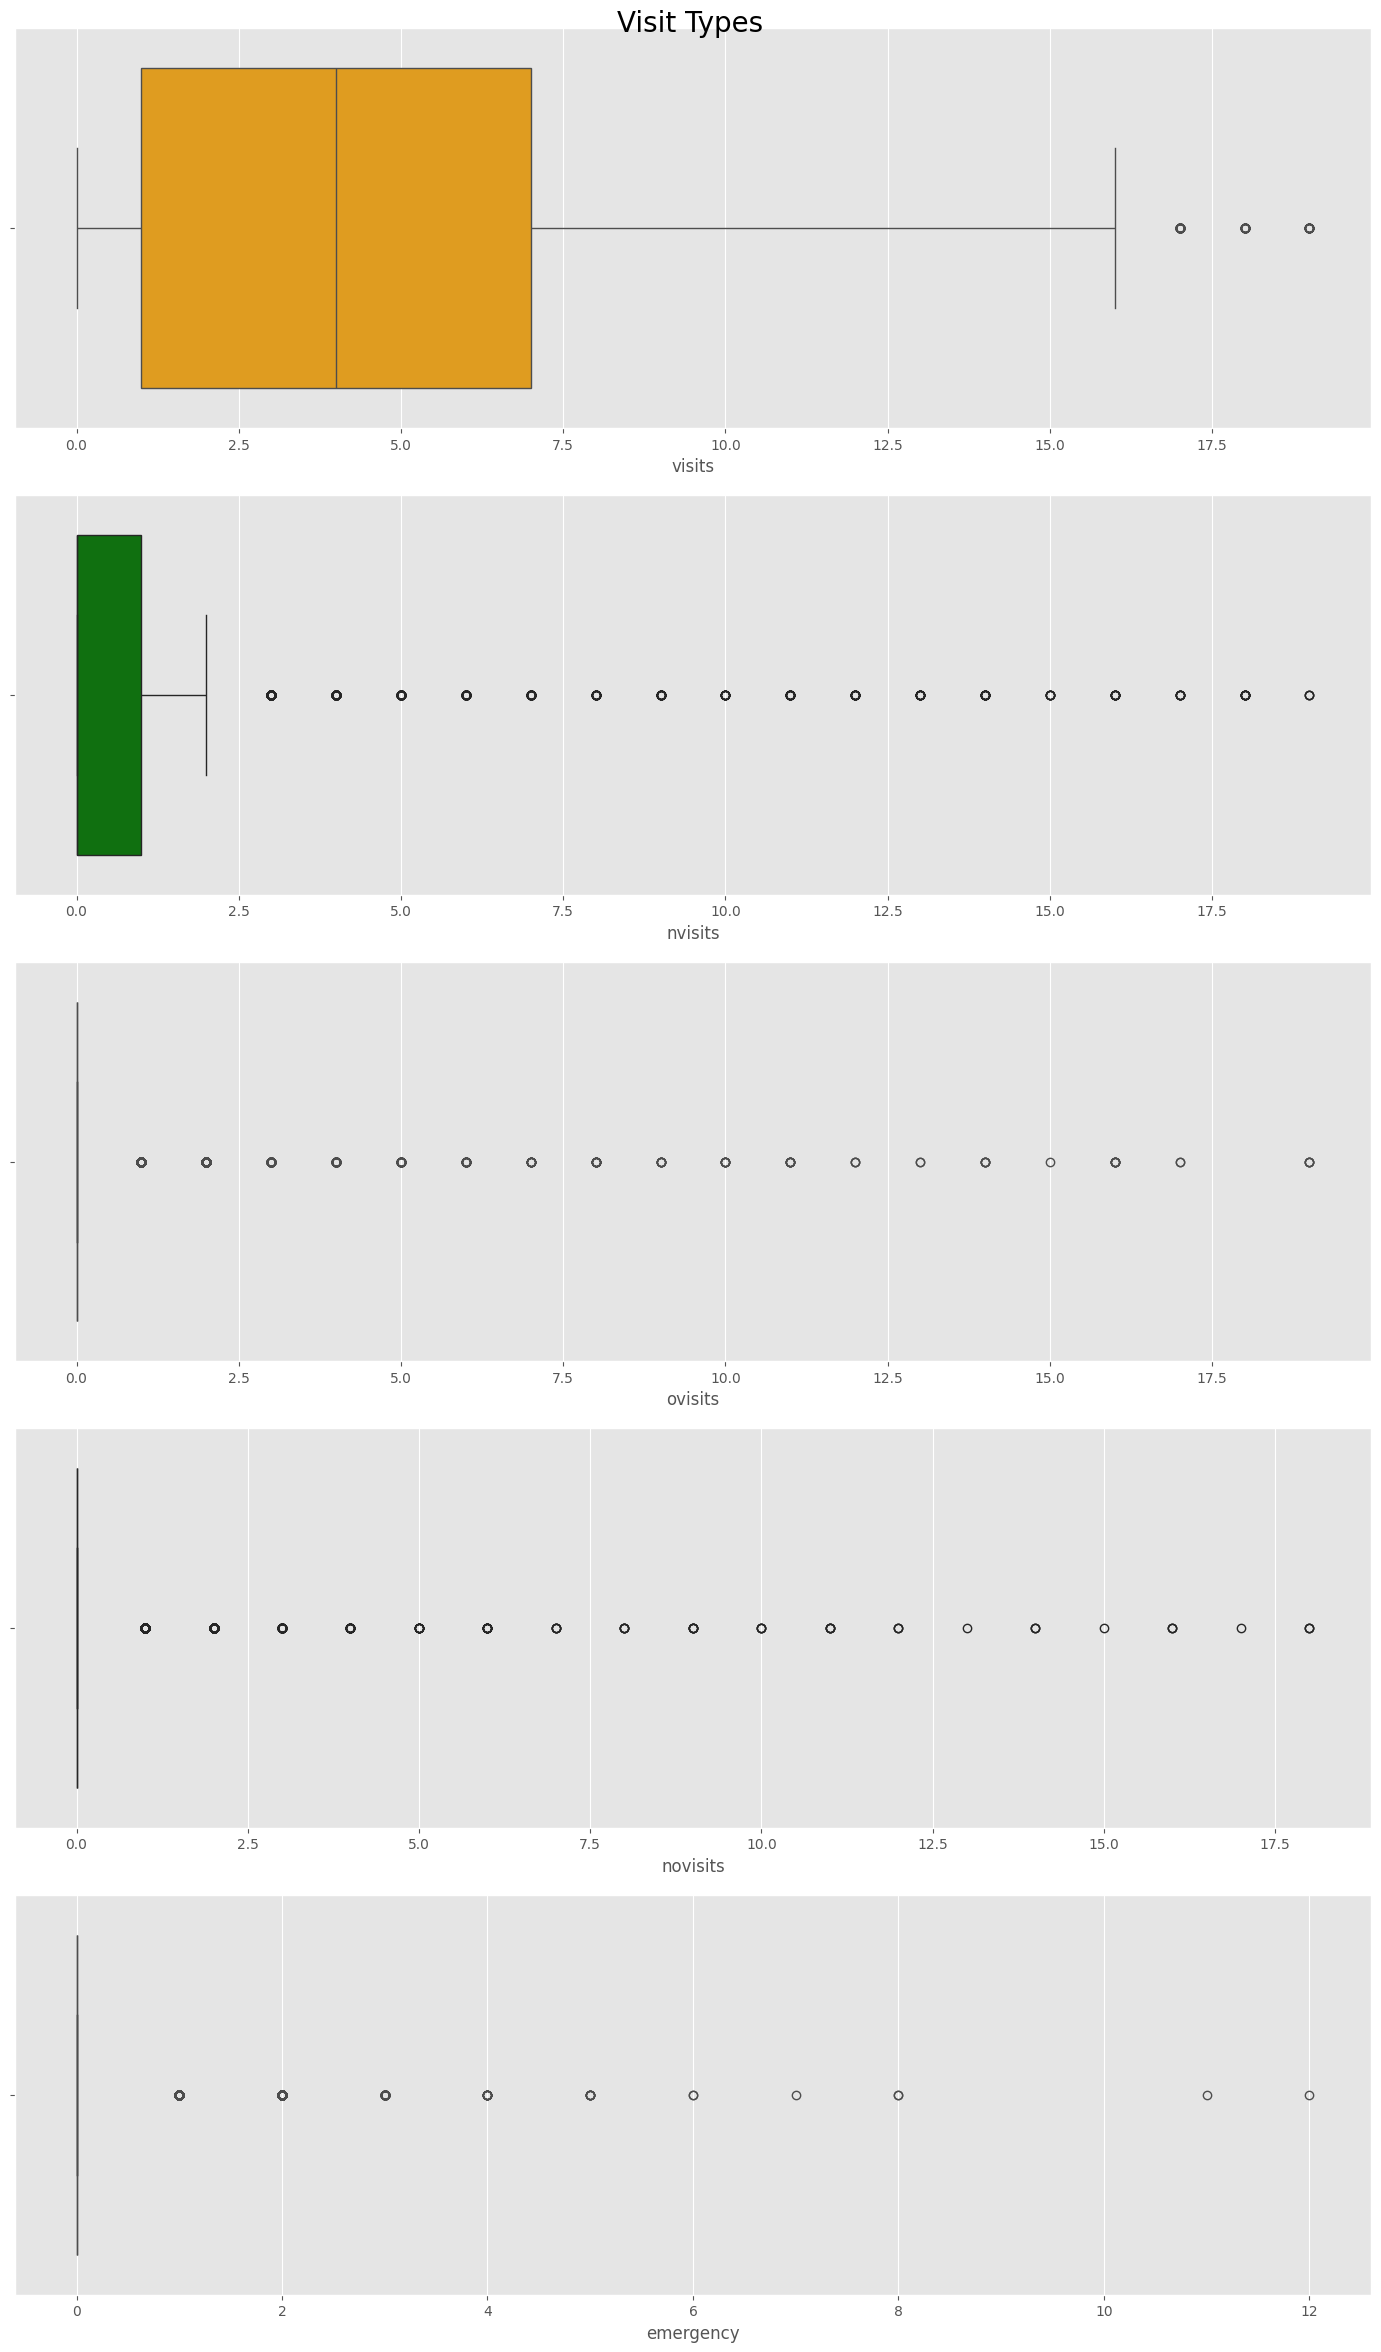

In [85]:
# build a grid (5x2) total of 10 cells
fig, axes = plt.subplots(nrows=5, figsize = (14,24), dpi = 100)

colors_list = ['orange','green','magenta','teal','red','blue','yellow','pink','brown','purple']

visit_cols = ['visits', 'nvisits', 'ovisits', 'novisits', 'emergency']

#flatten the axes so that we can have a series from 0 to 3 instead of [0,0] for example.
axes = axes.flatten()

for idx, col in enumerate(visit_cols):
    sns.boxplot(data=df[df[col] < 20], x=col, color=colors_list[idx], ax=axes[idx])

# Layout
fig.suptitle('Visit Types', fontsize=20)
fig.tight_layout(pad=1.4, w_pad=1)

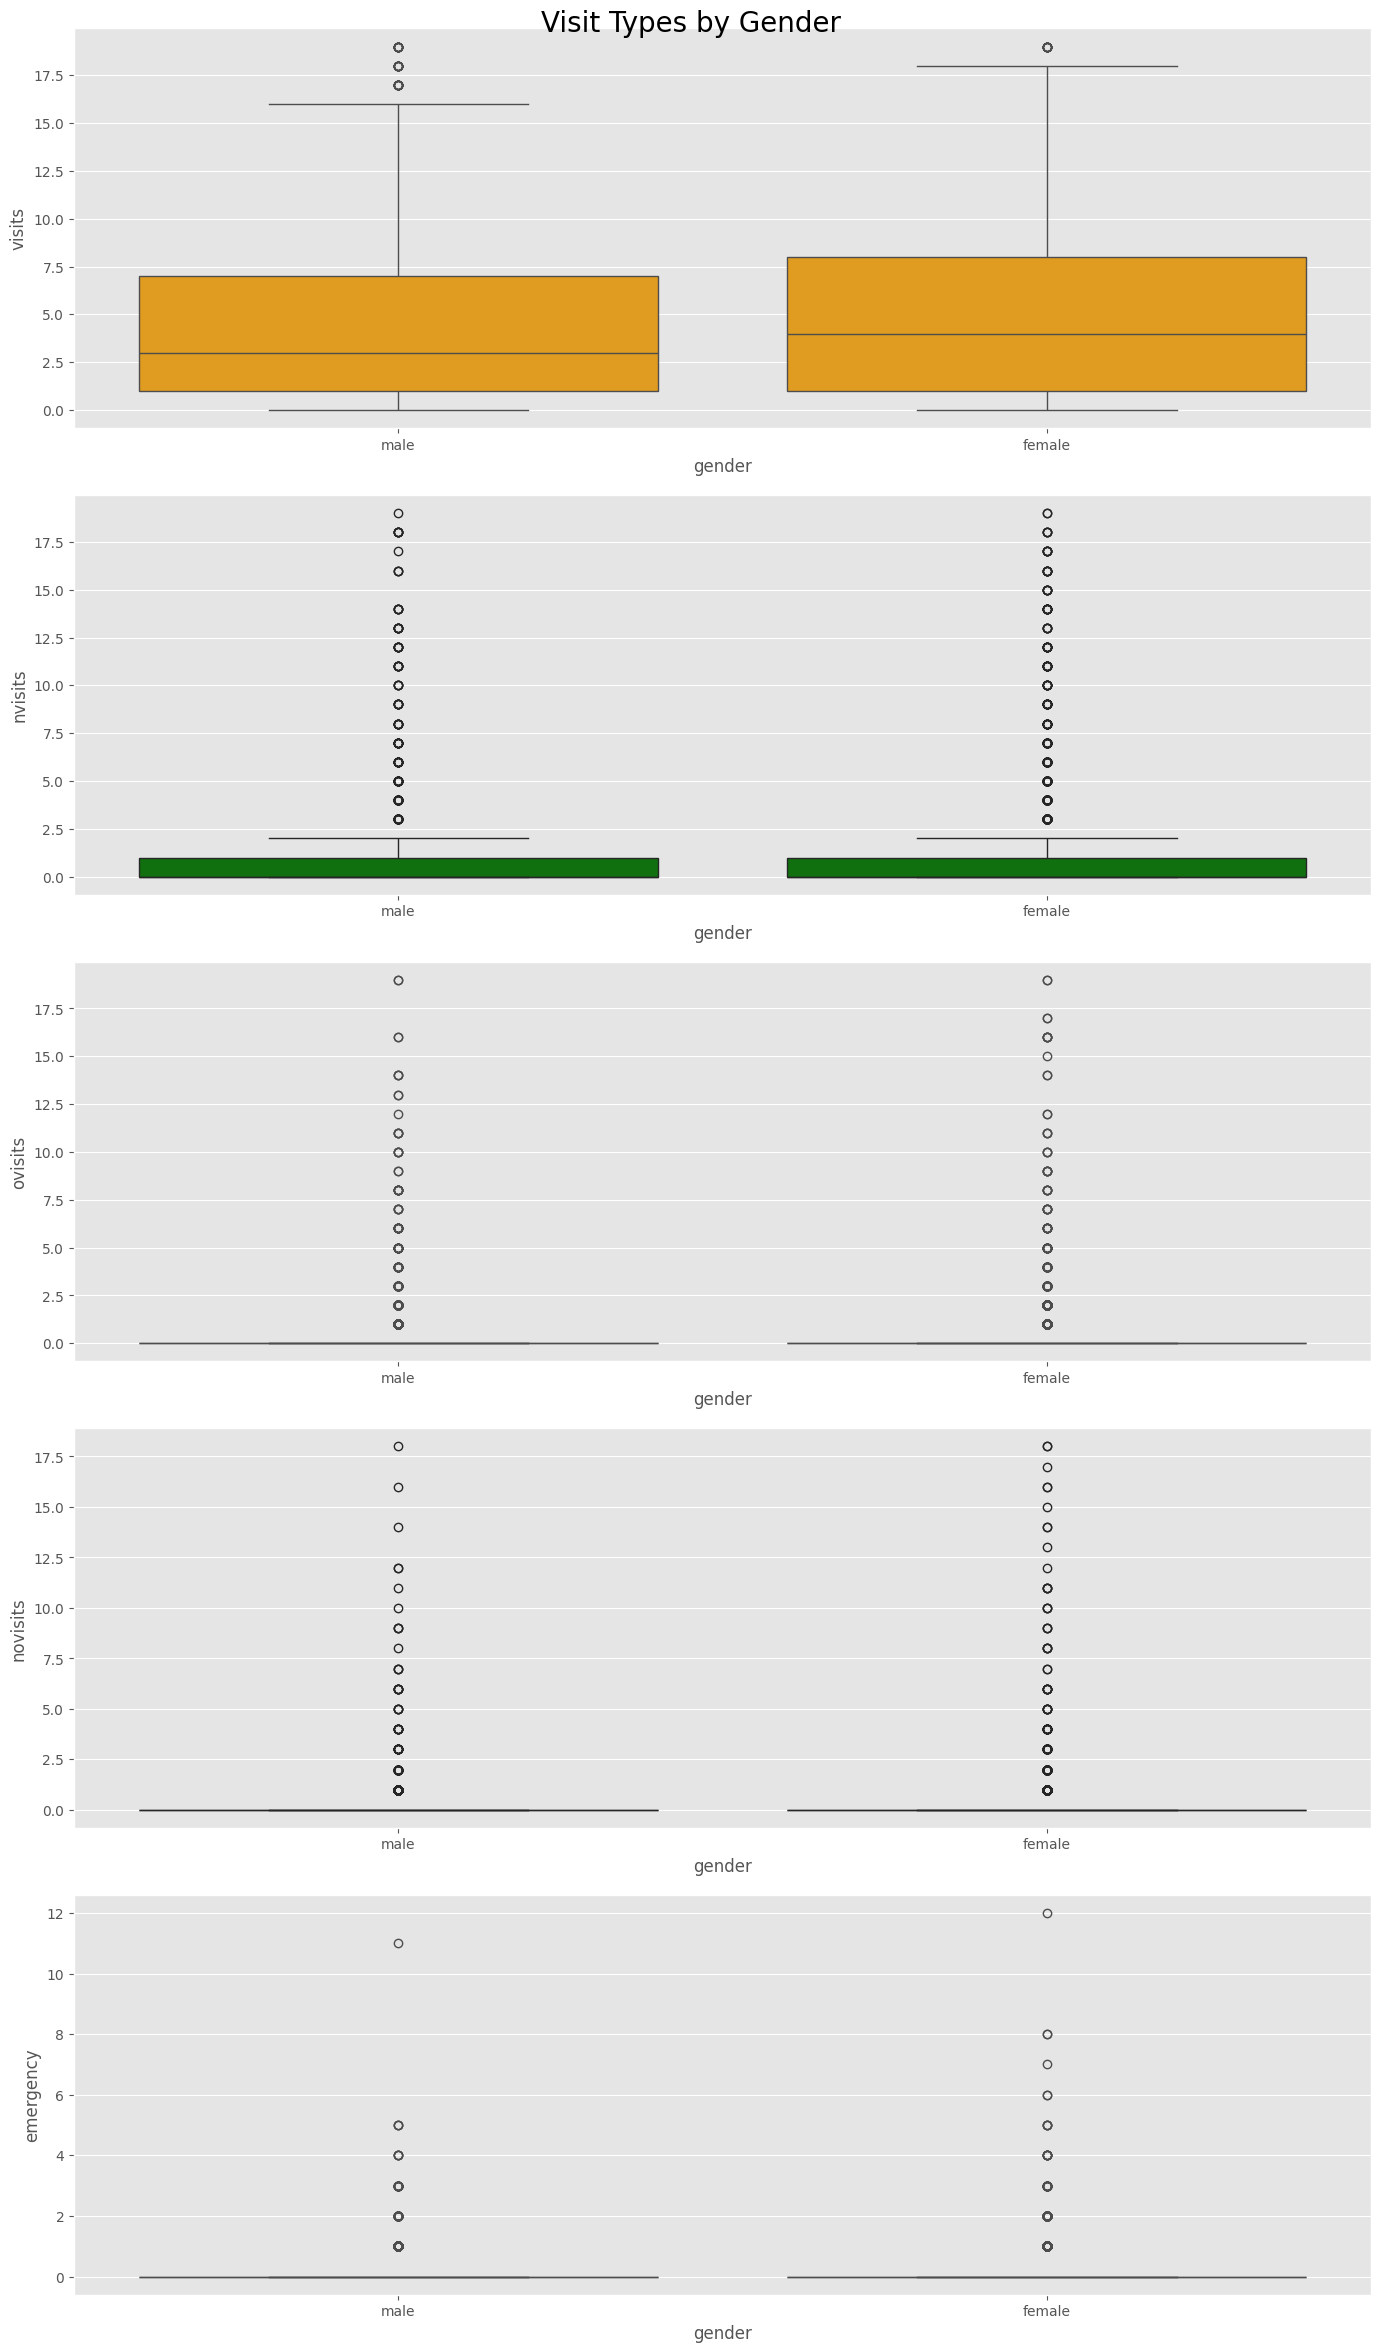

In [86]:
# build a grid (5x2) total of 10 cells
fig, axes = plt.subplots(nrows=5, figsize = (14,24), dpi = 100)

colors_list = ['orange','green','magenta','teal','red','blue','yellow','pink','brown','purple']

visit_cols = ['visits', 'nvisits', 'ovisits', 'novisits', 'emergency']

#flatten the axes so that we can have a series from 0 to 3 instead of [0,0] for example.
axes = axes.flatten()

for idx, col in enumerate(visit_cols):
    sns.boxplot(data=df[df[col] < 20], x='gender', y=col, color=colors_list[idx], ax=axes[idx])

# Layout
fig.suptitle('Visit Types by Gender', fontsize=20)
fig.tight_layout(pad=1.4, w_pad=1)

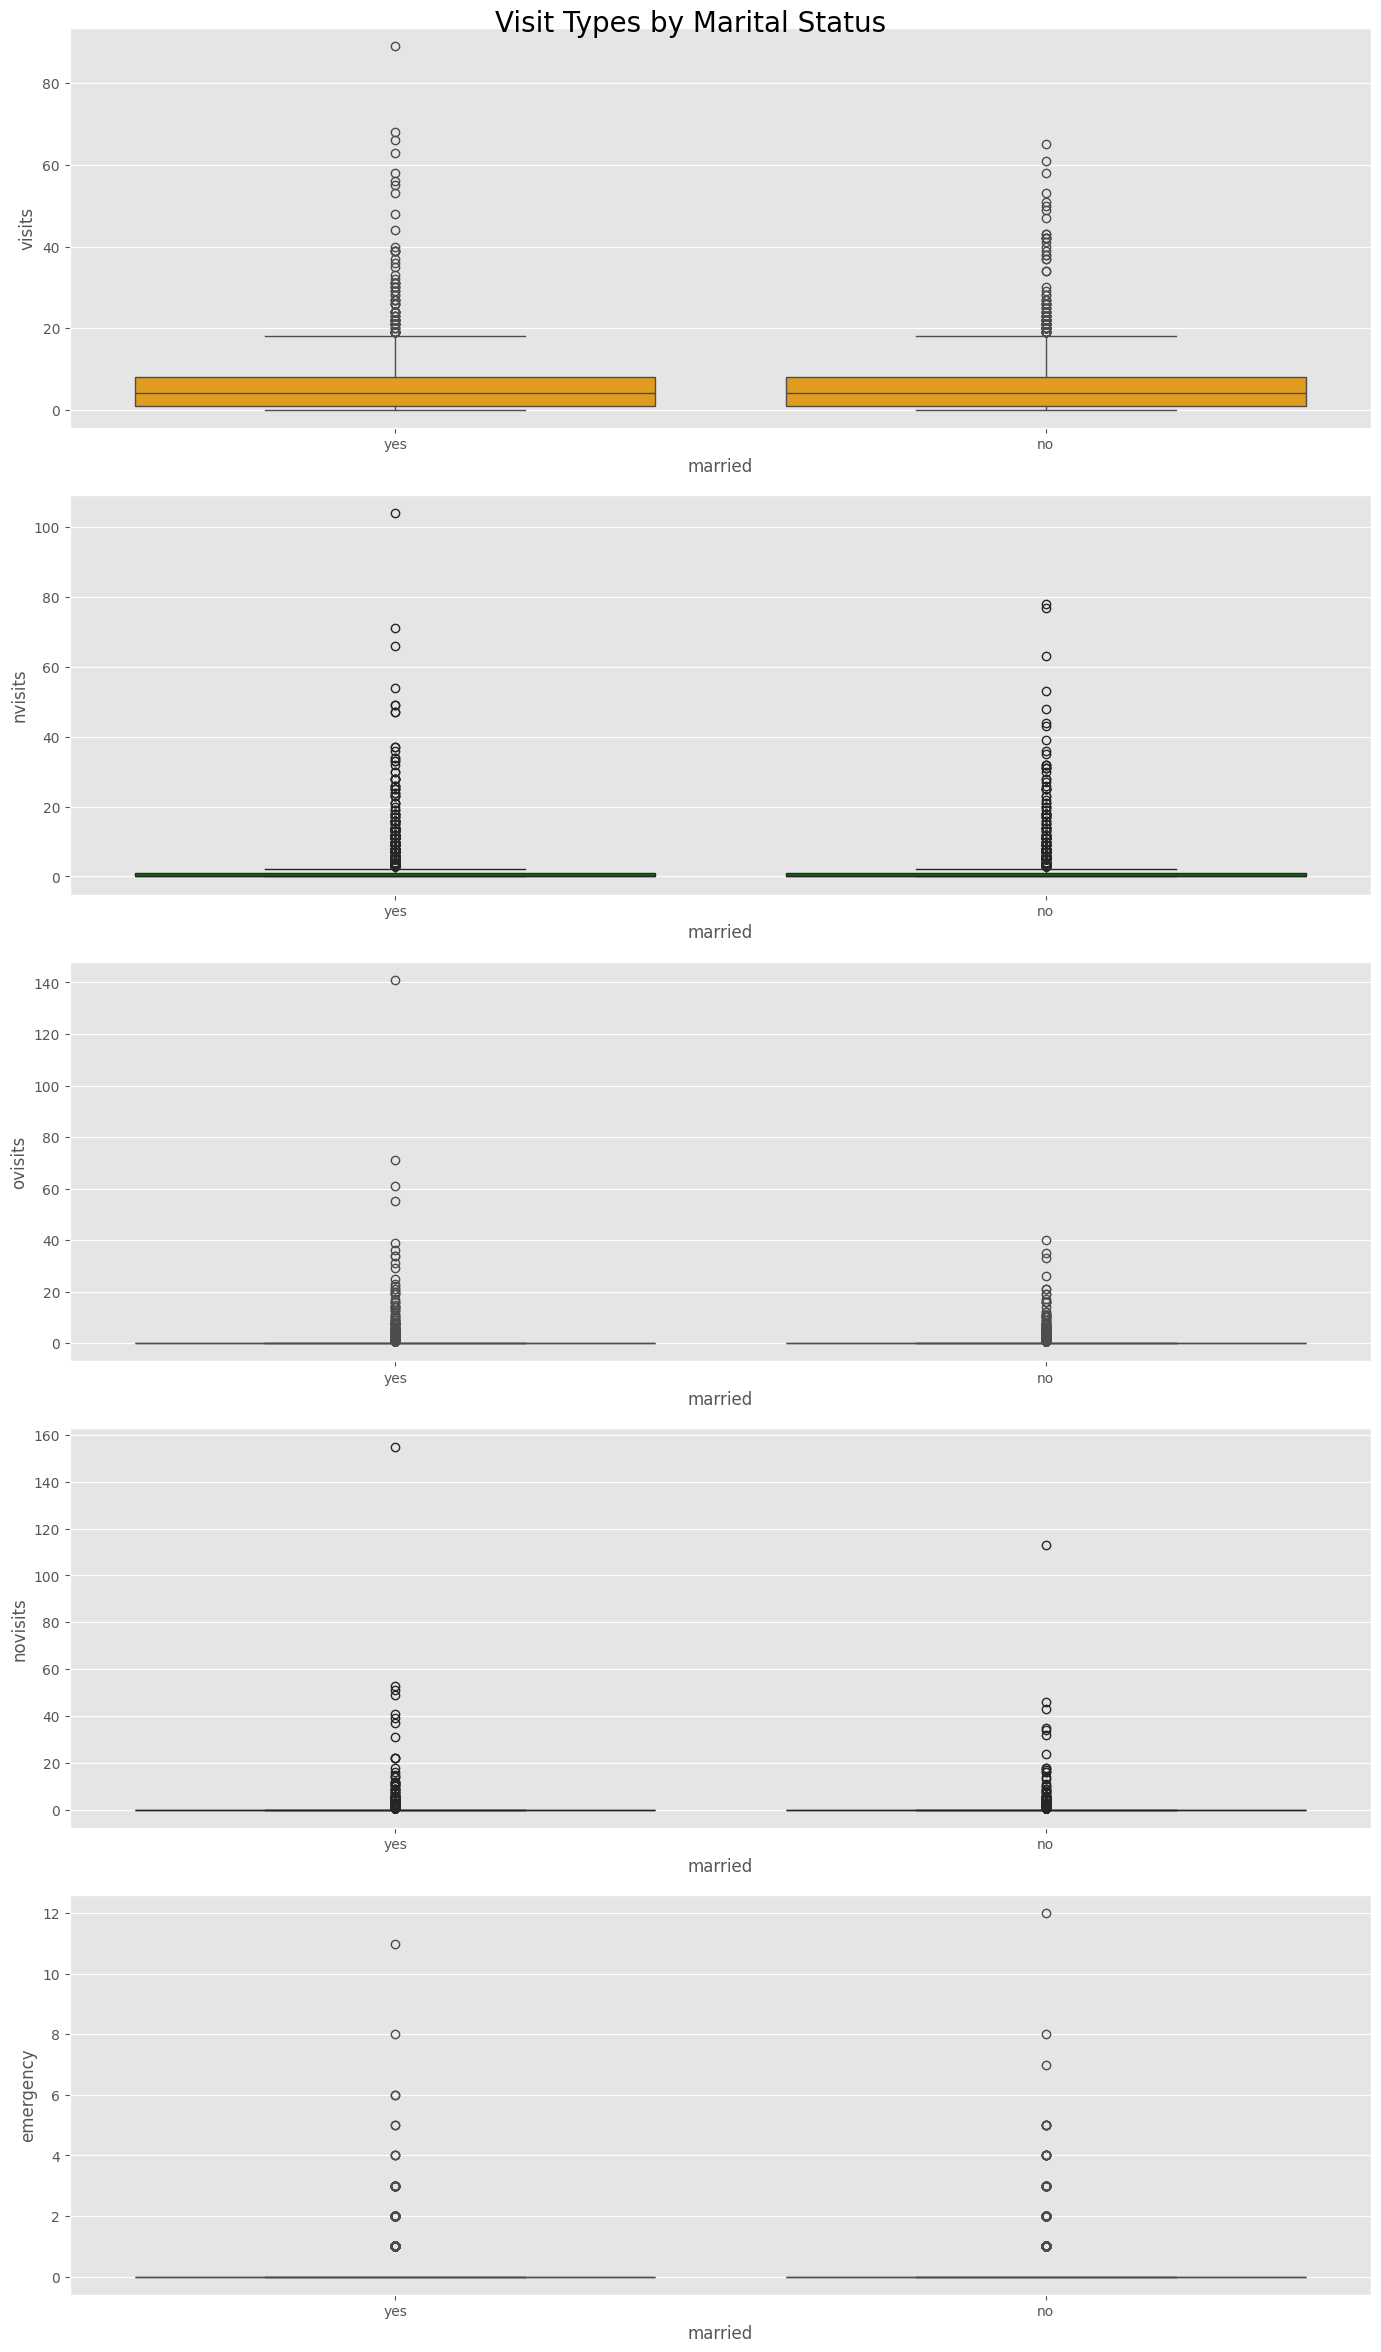

In [81]:
# build a grid (5x2) total of 10 cells
fig, axes = plt.subplots(nrows=5, figsize = (14,24), dpi = 100)

colors_list = ['orange','green','magenta','teal','red','blue','yellow','pink','brown','purple']

visit_cols = ['visits', 'nvisits', 'ovisits', 'novisits', 'emergency']

#flatten the axes so that we can have a series from 0 to 3 instead of [0,0] for example.
axes = axes.flatten()

for idx, col in enumerate(visit_cols):
    sns.boxplot(data=df, x='married', y=col, color=colors_list[idx], ax=axes[idx])

# Layout
fig.suptitle('Visit Types by Marital Status', fontsize=20)
fig.tight_layout(pad=1.4, w_pad=1)

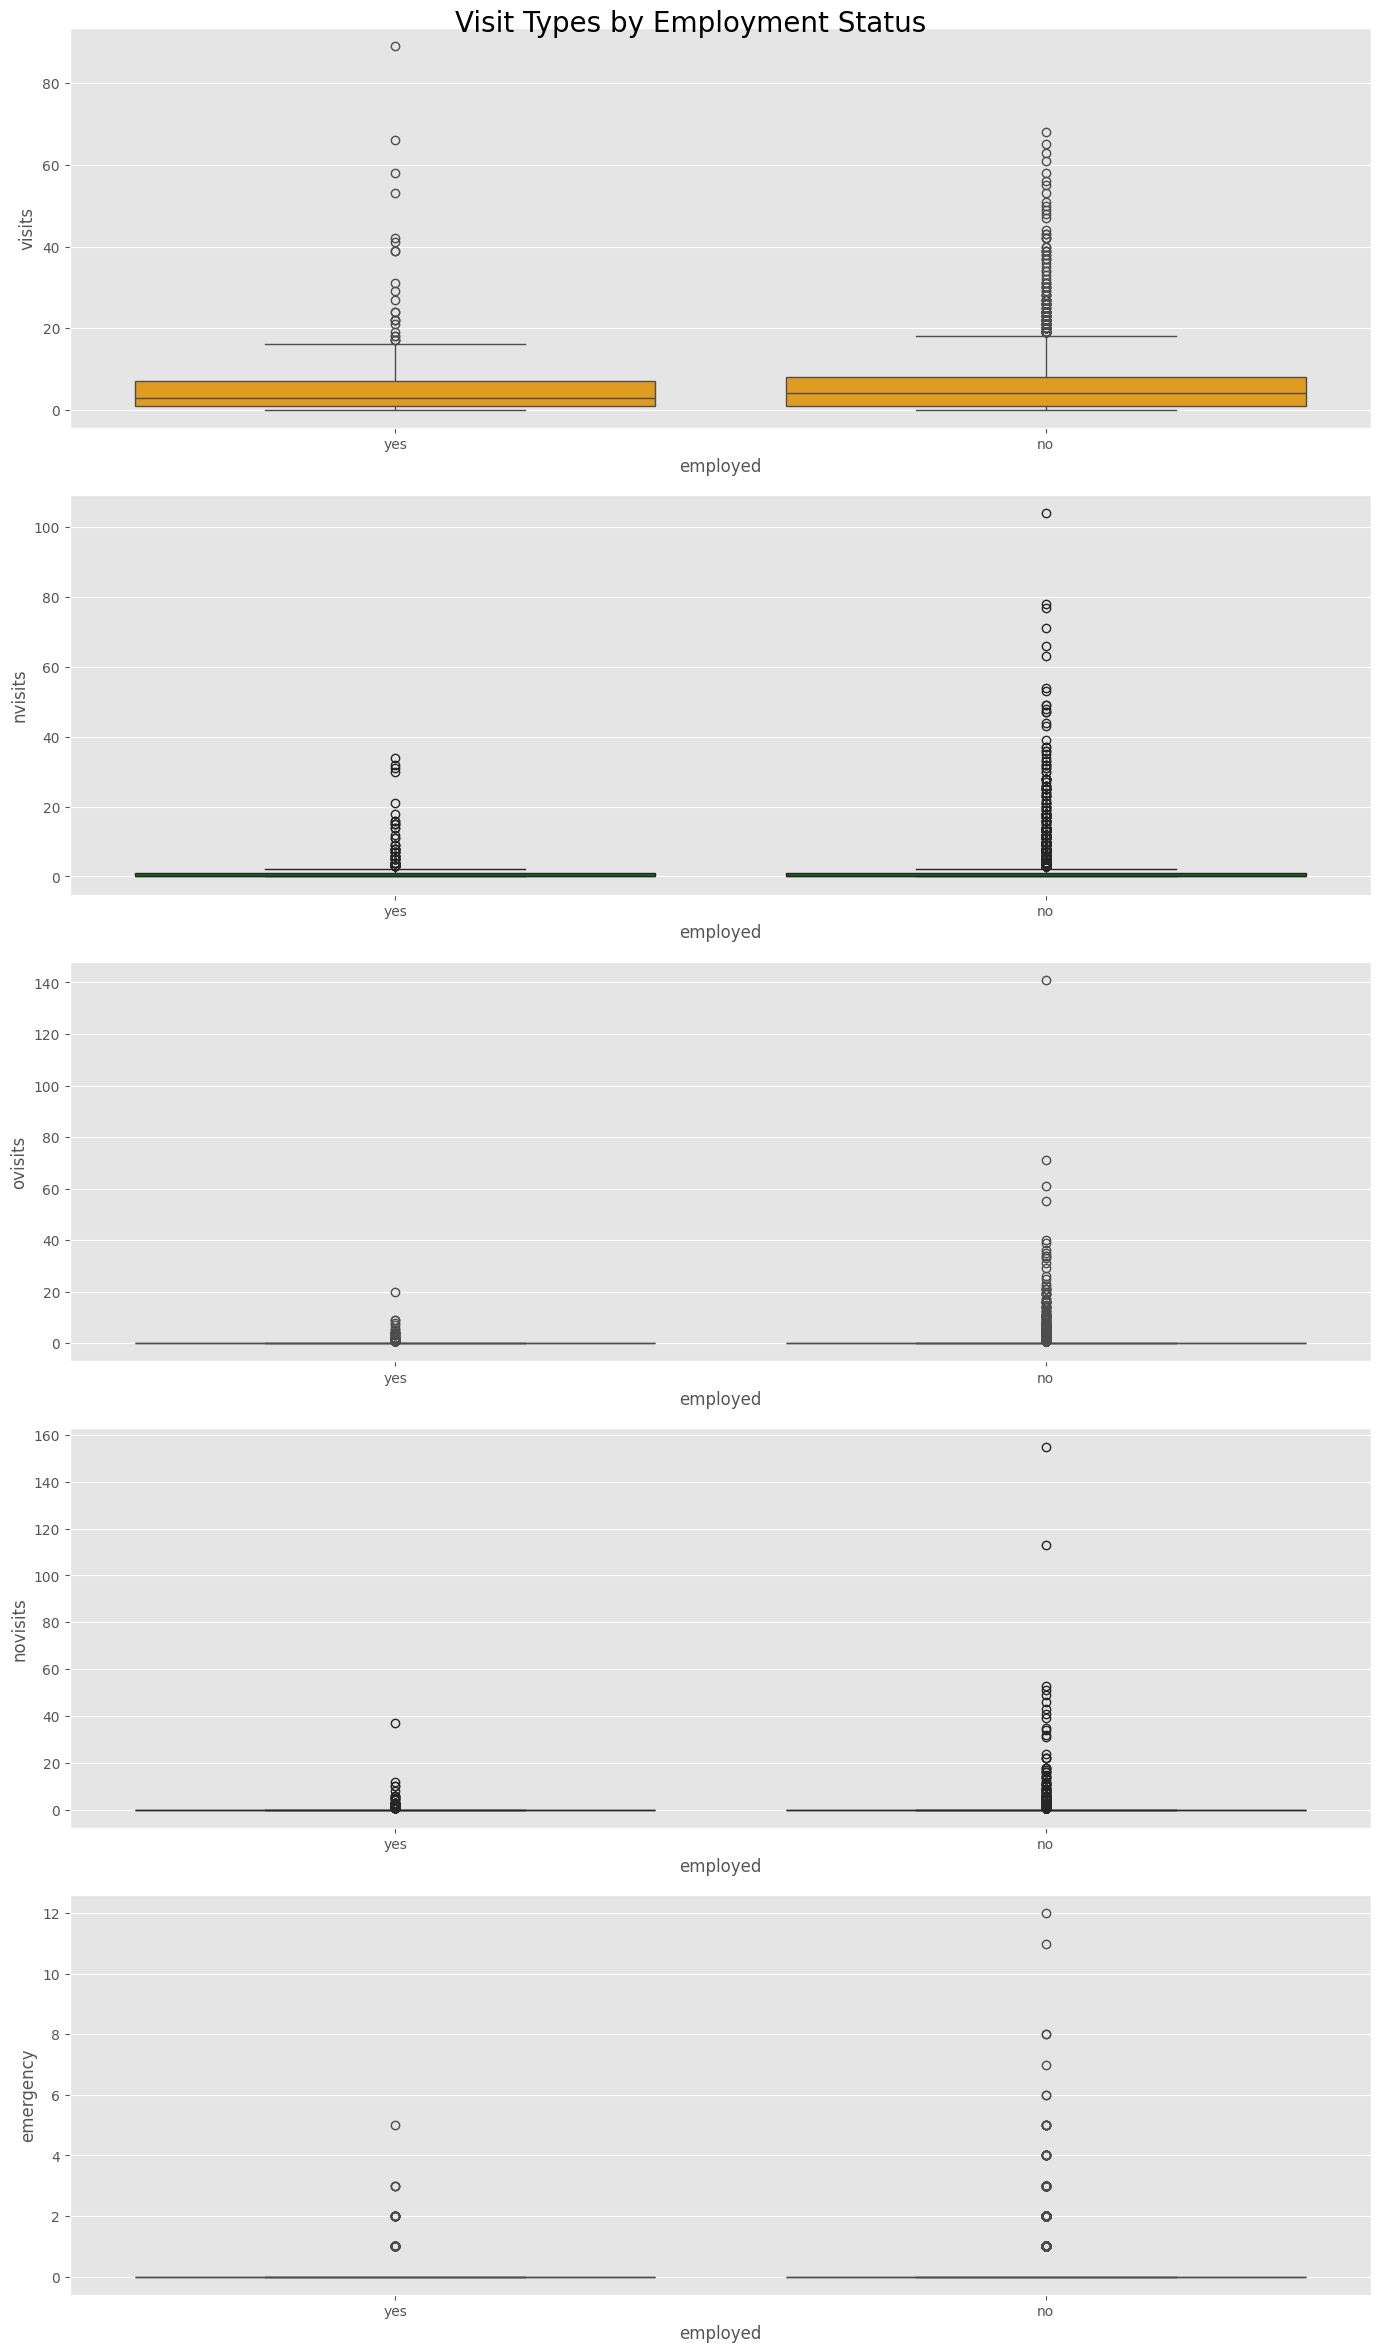

In [82]:
# build a grid (5x2) total of 10 cells
fig, axes = plt.subplots(nrows=5, figsize = (14,24), dpi = 100)

colors_list = ['orange','green','magenta','teal','red','blue','yellow','pink','brown','purple']

visit_cols = ['visits', 'nvisits', 'ovisits', 'novisits', 'emergency']

#flatten the axes so that we can have a series from 0 to 3 instead of [0,0] for example.
axes = axes.flatten()

for idx, col in enumerate(visit_cols):
    sns.boxplot(data=df, x='employed', y=col, color=colors_list[idx], ax=axes[idx])

# Layout
fig.suptitle('Visit Types by Employment Status', fontsize=20)
fig.tight_layout(pad=1.4, w_pad=1)

**Observations**
- Lots of outliers everywhere, and we need to cut out a lot of them to be able to see box plots for everything but the basic number of visits
- Marital Status and Employment Status don't seem to affect number of visits.
- Gender seems to have a slight effect on number of visits: Q1 is the same, and Q2 and Q3 are only slightly higher for women. Most of the differences are already in the outliers.

Generate a plot to view the number of individuals within each age group, separated by gender.

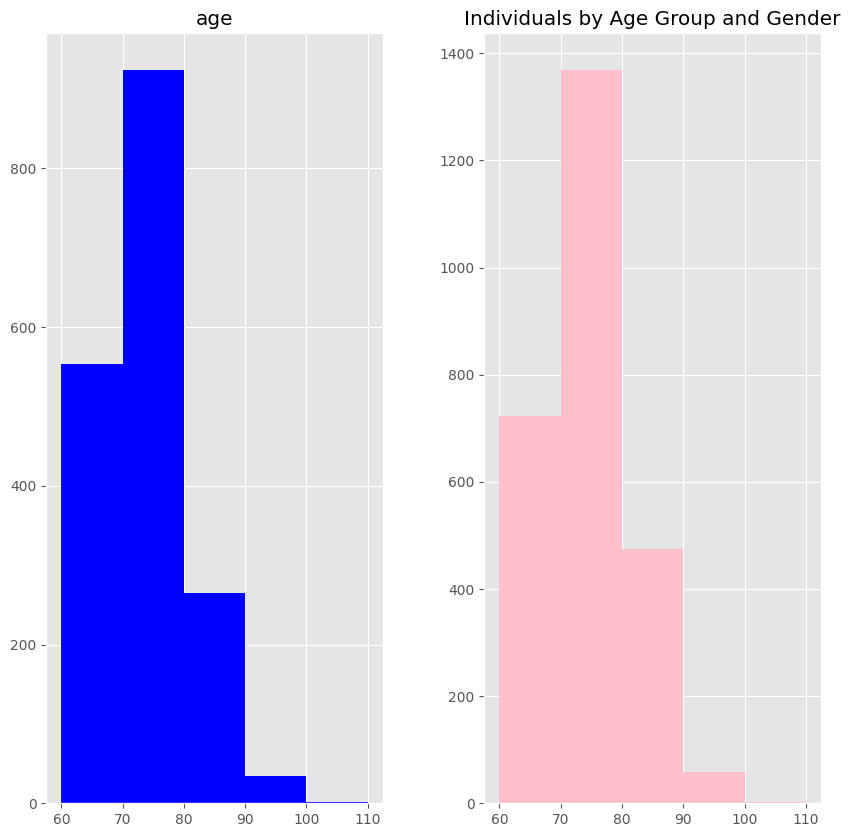

In [111]:
fig, axes = plt.subplots(ncols=2, figsize = (10, 10), dpi = 100)
df_age_gender = df[['age', 'gender']]
df_age_gender[df_age_gender['gender'] == 'male'].hist(bins=[60, 70, 80, 90, 100, 110], ax=axes[0], color="blue")
df_age_gender[df_age_gender['gender'] == 'female'].hist(bins=[60, 70, 80, 90, 100, 110], ax=axes[1], color="pink")
#df_age_gender
#sns.histplot(data=df, x='age')

plt.title('Individuals by Age Group and Gender')
plt.show()

<Axes: xlabel='gender', ylabel='Count'>

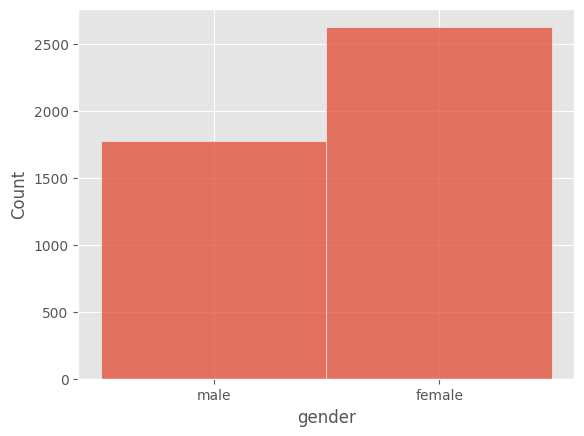

In [103]:
age_grp_gender_cat = df[['age','gender']]
sns.histplot(data=age_grp_gender_cat, x='gender')